In [1]:
import imageio
import matplotlib.pyplot as plt
import torch
import numpy as np
k=['/ssd/hk/Syria_samples/samples_enhance_v2/post/Aleppo_enhance-A-B-2_203201.png',
'/ssd/hk/Syria_samples/samples_enhance_v2/post/Aleppo_enhance-A-B-3_203201.png',
'/ssd/hk/Syria_samples/samples_enhance_size6_AREA_v2/post/Aleppo_enhance-A-B-2_203201.pth',
'/ssd/hk/Syria_samples/samples_enhance_size6_AREA_v2/post/Aleppo_enhance-A-B-3_203201.pth']
fig=plt.figure(figsize=(20,20),dpi=900)
for i in range(4):
    kk=k[i]
    if kk[-3:]=='png':
        img=imageio.imread(kk)
    else:
        img=torch.load(kk).transpose(1,2,0).astype(np.int)
    ax = fig.add_subplot(2,2,i+1)
    plt.yticks(fontproperties = 'Times New Roman', size = 20)
    plt.xticks(fontproperties = 'Times New Roman', size = 20)
    # ax.set_ylabel('Post',size = 16)
    # plt.figure(figsize=(10,10))
    ax.imshow(img)
    # plt.show()
# plt.savefig('./fig/sample.png')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


In [2]:
from glob import glob
import torch
hh=torch.load('/ssd/hk/Syria_samples/split_havedamaged_size120_all_v3/train.pth')
hhh=[]
cities=['Aleppo','Raqqa','Homs','Hama','Deir-ez-Zor','Idlib']
cities_dam_coord={}
for c in cities:
    cities_dam_coord[c]=[i[-10:-4] for i in glob(f'/ssd/hk/Syria_samples/samples_rebuilding/label/{c}*.npy')]
for i in hh:
    city=os.path.basename(i[0][0]).split('_')[0]
    coord=i[0][0].split('_')[-1][:6]
    if coord in cities_dam_coord[city]:
        hhh.append(i)   

In [16]:
torch.save(hhh,'/ssd/hk/Syria_samples/split_havedamaged_size120_all_v3/train2.pth')

白色为未损毁，红色损毁，黄色需要标注
Hama 023087
n
B


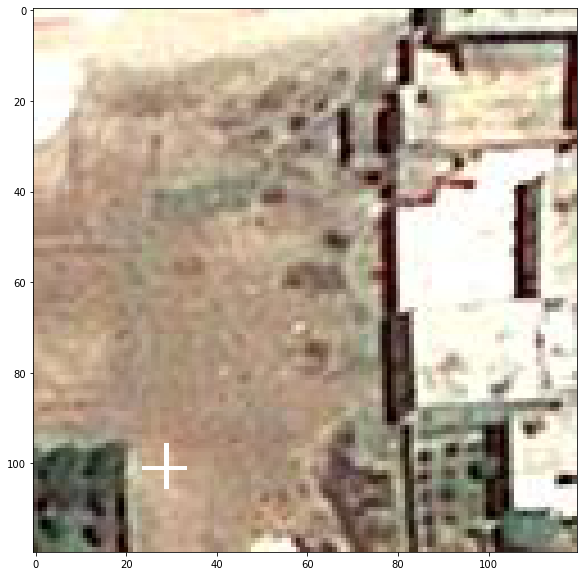

B


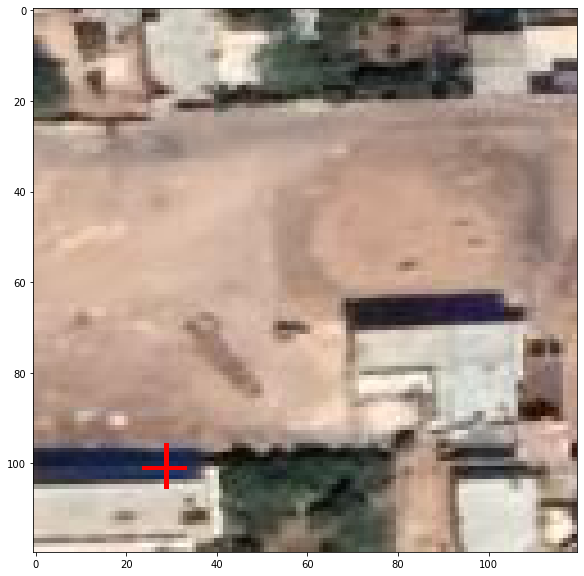

B-C-1


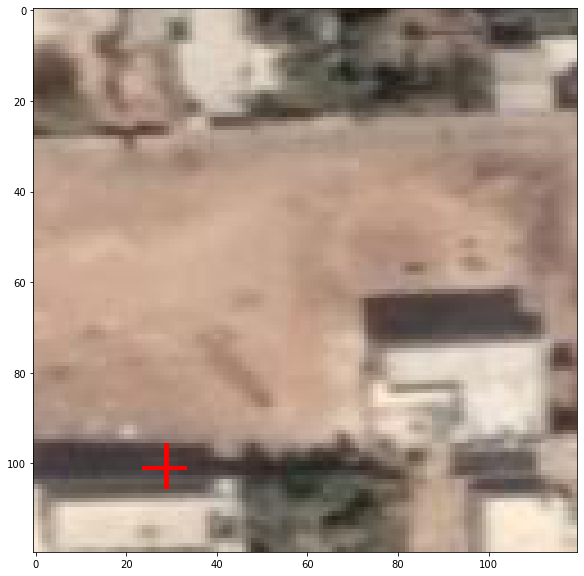

C


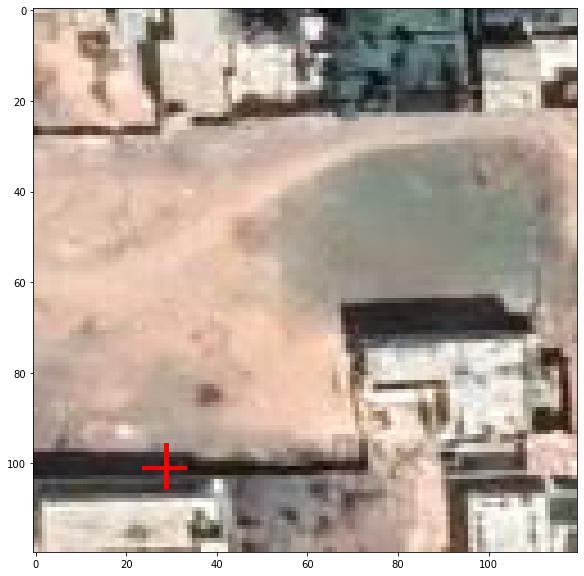

C-D-1


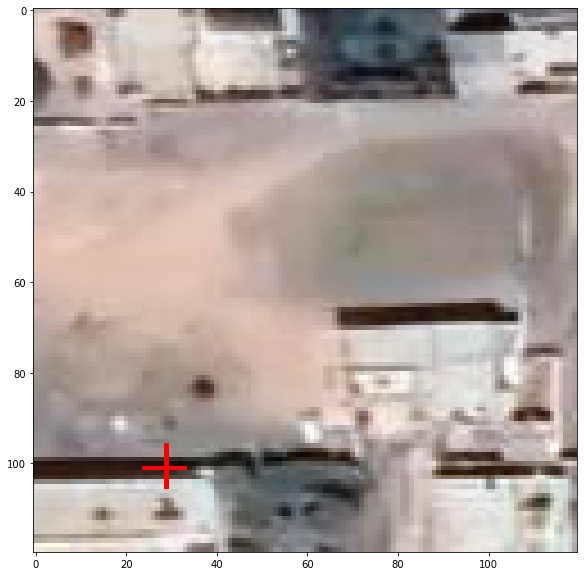

C-D-2


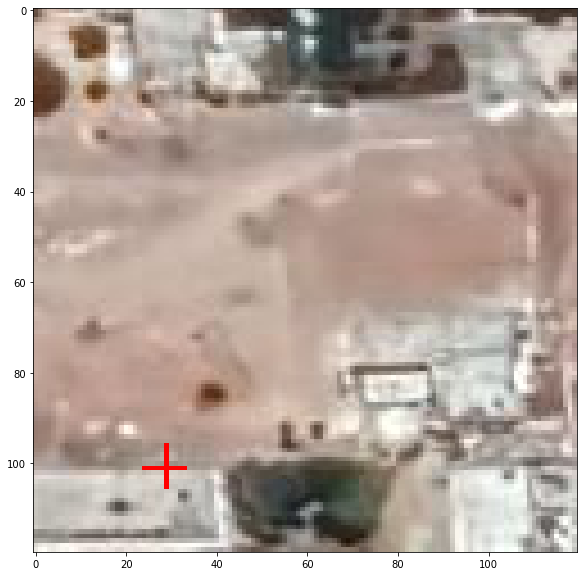

C-D-3


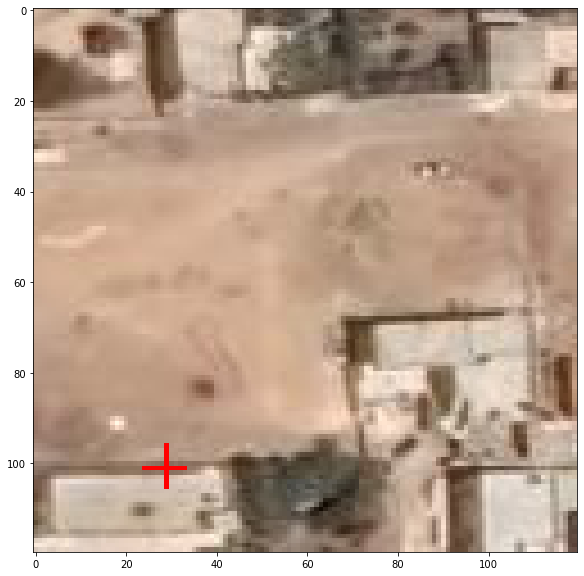

C-D-4


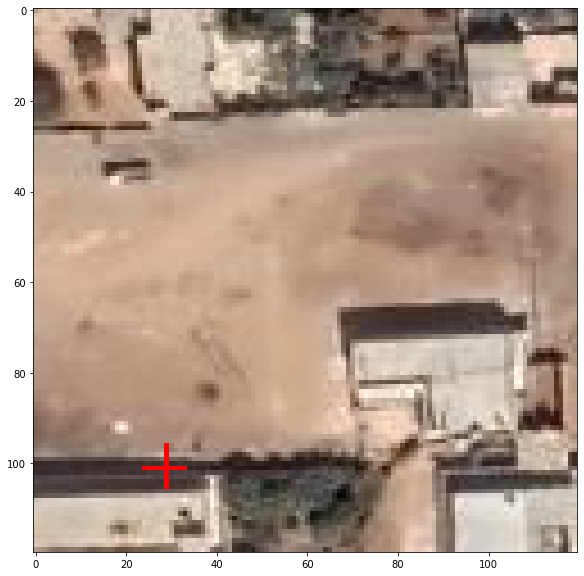

C-D-5


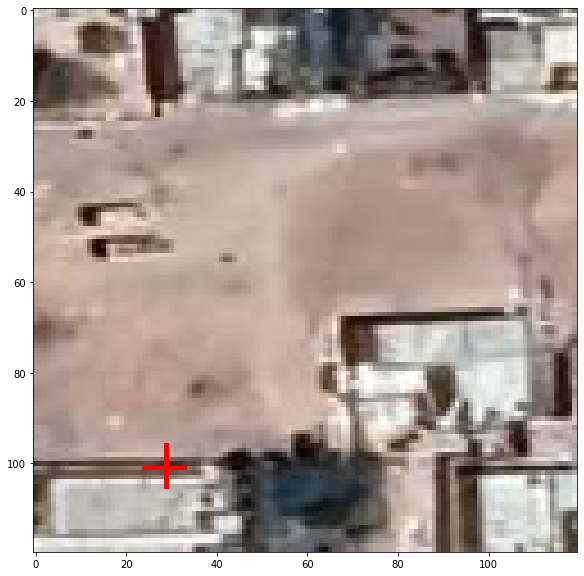

C-D-6


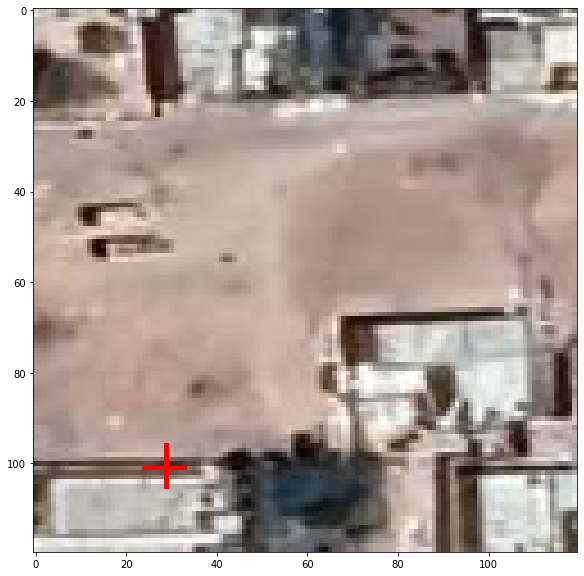

D-Z-1


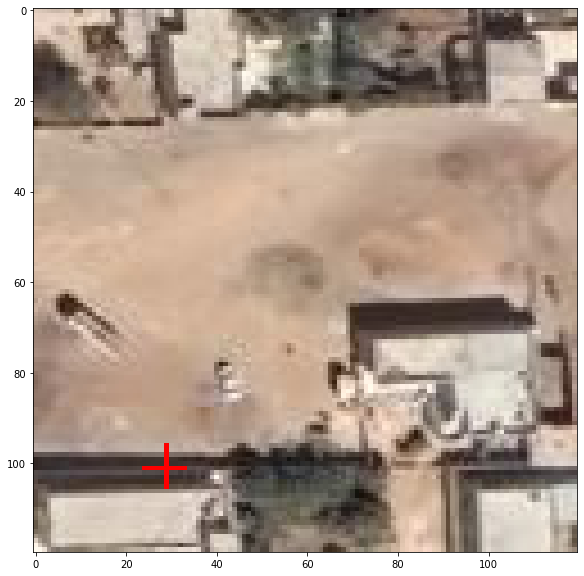

D-Z-2


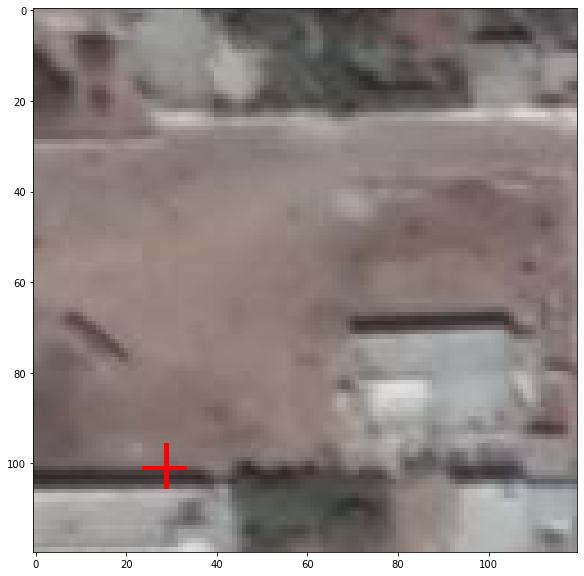

D-Z-3


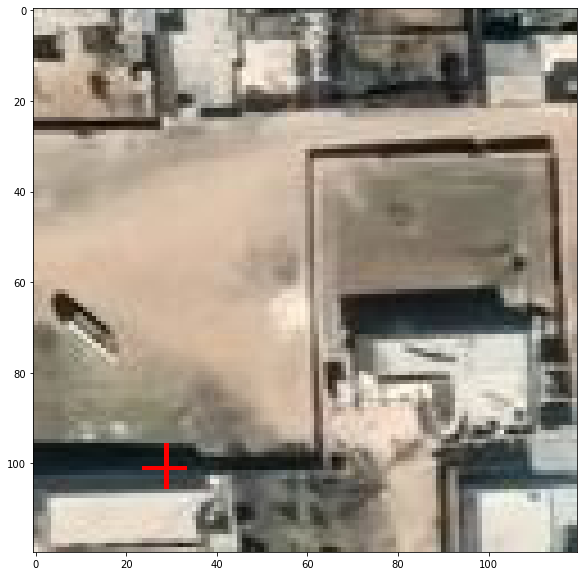

D-Z-4


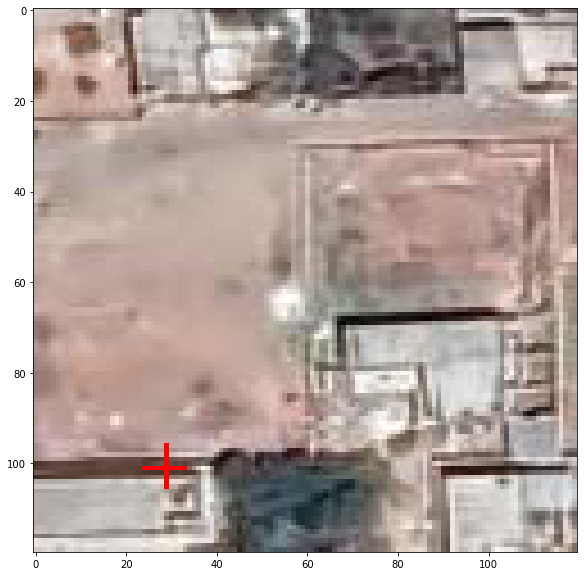

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [19]:
import imageio
import torch
import numpy as np
import matplotlib.pylab as plt
hhh=torch.load('/ssd/hk/Syria_samples/split_havedamaged_size120_all_v3/val2.pth')
mt=10
print('白色为未损毁，红色损毁，黄色需要标注')
city=os.path.basename(hhh[mt][0][0]).split('_')[0]
coord=hhh[mt][0][0].split('_')[-1][:6]
print(city,coord)
print(hhh[mt][1][0])
for index in range(len(hhh[mt][0])):
    i=hhh[mt][0][index]

    # print(i)
    l=os.path.basename(i).split('_')[1]

    m=imageio.imread(i)
    if 'enhance' in l:
        l=l[8:]
    print(l)
    if 'rebuilding' not in i:
        label=hhh[mt][1][index]
        # print(label)
    else:
        label='r'
        # print(label)
    if l[0] in ['B','C','D','E','F']:
        mask=np.load('/ssd/hk/Syria_samples/samples_rebuilding/label/'+f'{city}_{l[0]}_{coord}.npy')
        d_coords=np.array(np.where(mask>0))
        for j in range(d_coords.shape[1]):
            d_coord=d_coords[:,j]
            if label=='p':
                m[d_coord[0]-5:d_coord[0]+5,d_coord[1],:]=0
                m[d_coord[0],d_coord[1]-5:d_coord[1]+5,:]=0
                m[d_coord[0]-5:d_coord[0]+5,d_coord[1],0]=255
                m[d_coord[0],d_coord[1]-5:d_coord[1]+5,0]=255
            elif label=='n':
                m[d_coord[0]-5:d_coord[0]+5,d_coord[1],:]=255
                m[d_coord[0],d_coord[1]-5:d_coord[1]+5,:]=255
    elif l[0]=='A':
        pass
    else:
        for j in range(d_coords.shape[1]):
            d_coord=d_coords[:,j]
            m[d_coord[0]-5:d_coord[0]+5,d_coord[1],:]=255
            m[d_coord[0],d_coord[1]-5:d_coord[1]+5,:]=255
            m[d_coord[0]-5:d_coord[0]+5,d_coord[1],2]=0
            m[d_coord[0],d_coord[1]-5:d_coord[1]+5,2]=0




    # plt.figure(figsize=(10,10))
    # plt.imshow(mask)
    # plt.show()

    plt.figure(figsize=(10,10))
    plt.imshow(m)
    plt.show()

In [6]:
import sys
import imageio
import matplotlib.pyplot as plt
import torch
import numpy as np
sys.path.append('..')
from model import mynet6size120mtc1v7
model=mynet6size120mtc1v7.mynet6size120mtc1v7()
from collections import OrderedDict
# w=torch.load('/home/hk/python_script/Ukraine/checkpoints/试一试_mynet6size120mtc1v2_Ukrain_size120_allcitiesall_effectweight_v3_multi-time_RandomDelandCopyv2_2/best_ckpt.pt')['model_state_dict']
w=torch.load('/home/hk/python_script/Ukraine/checkpoints/试一试_mynet6size120mtc1v7_Syria_size120_allcitiesall_effectweight_v3_multi-time_RandomDelandCopyv2_6/best_ckpt.pt')['model_state_dict']
w2={}
for k in w.keys():

    k2=k.replace('module.','')
    w2[k2]=w[k]
w2=OrderedDict(w2)
model.load_state_dict(w2)

<All keys matched successfully>

In [77]:
mt=20
def cat(img_pre,img_post):
    data=np.concatenate((img_pre,img_post),axis=0)
    data=torch.Tensor(data)
    return data
pathes=hhh[mt][0]
label=hhh[mt][1]
path_pre=pathes[0]
path_post=pathes[1:]

labels=label[1:]
img_pre=imageio.imread(path_pre).transpose(2,0,1)
imgs=[cat(img_pre,imageio.imread(post).transpose(2,0,1)) if post is not None else np.zeros((6,120,120)) for post in path_post]
data=np.concatenate(imgs,axis=0)

labels_v=[]
for label in labels:
    if label=='p':
        labels_v.append(1)
    elif label=='n':
        labels_v.append(0)
    elif label is None:
        labels_v.append(-1)
    else:
        print(label)
        print(path_pre)
        print('label error')
if np.array(labels_v).sum()==-16:
    # print(labels_)
    print(labels)
    # print(mask_num,mask)
labels_v=torch.tensor(labels_v)
input=[data,labels_v]
input[0]=torch.Tensor(input[0])
output=model(torch.Tensor(input[0]).unsqueeze(0))
# print('feature1 shape:',feature1.shape)
# print('feature2 shape:',feature2.shape)
print('label      :',input[1].cpu().numpy())
print('pred result:',torch.argmax(output,dim=2)[0].cpu().numpy())

label      : [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
pred result: [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [78]:
input[1].cpu().numpy().shape

(16,)

In [79]:
hhh[mt][0]

['/ssd/hk/Syria_samples/samples_v2/pre/Homs_B_063073.png',
 '/ssd/hk/Syria_samples/samples_v2/post/Homs_B_063073.png',
 '/ssd/hk/Syria_samples/samples_enhance_v2/post/Homs_enhance-B-C-1_063073.png',
 '/ssd/hk/Syria_samples/samples_enhance_v2/post/Homs_enhance-B-C-2_063073.png',
 '/ssd/hk/Syria_samples/samples_v2/post/Homs_C_063073.png',
 '/ssd/hk/Syria_samples/samples_enhance_v2/post/Homs_enhance-C-Z-1_063073.png',
 '/ssd/hk/Syria_samples/samples_enhance_v2/post/Homs_enhance-C-Z-2_063073.png',
 '/ssd/hk/Syria_samples/samples_enhance_v2/post/Homs_enhance-C-Z-3_063073.png',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [80]:
hhh[mt][1]

['n',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

A


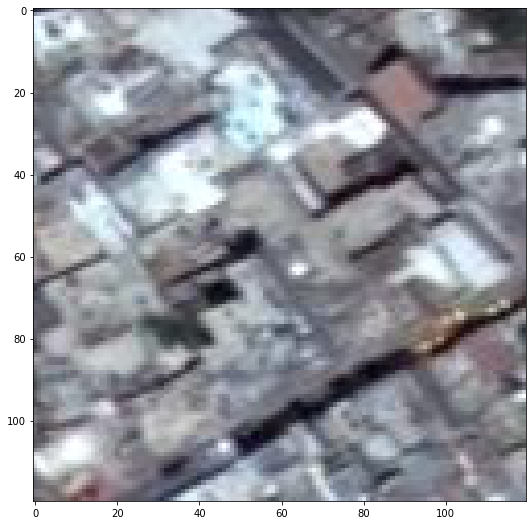

B label:1 pred:1


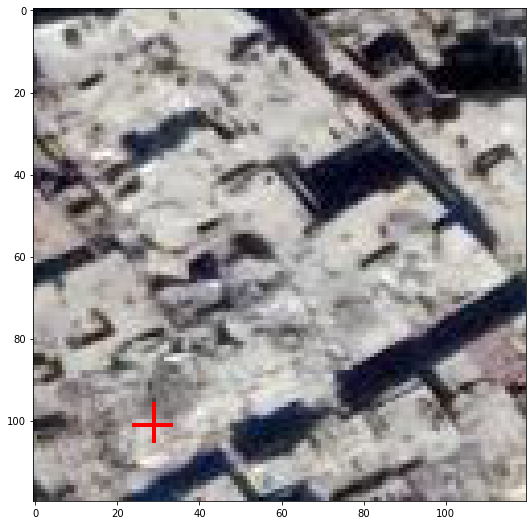

B-C-1 label:1 pred:1


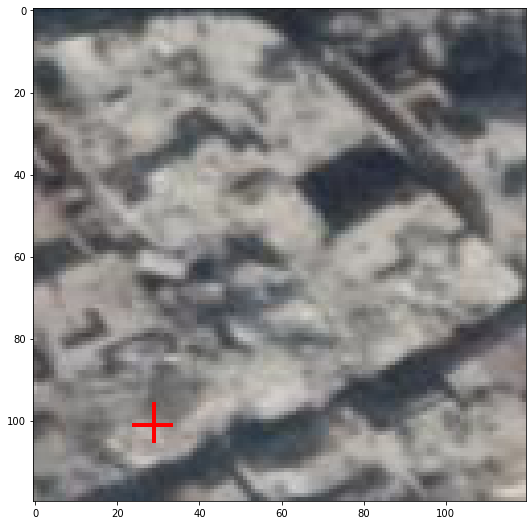

B-C-2 label:1 pred:1


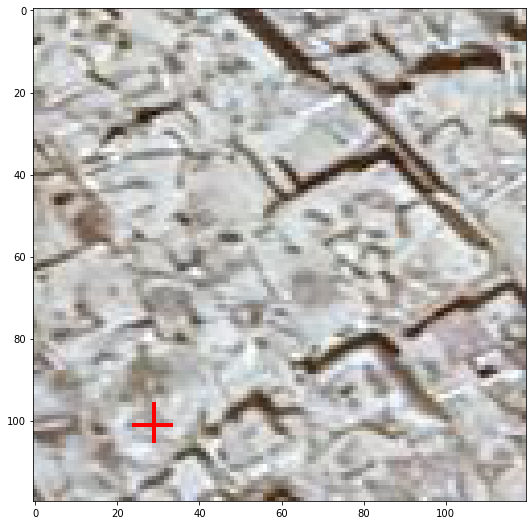

C label:1 pred:1


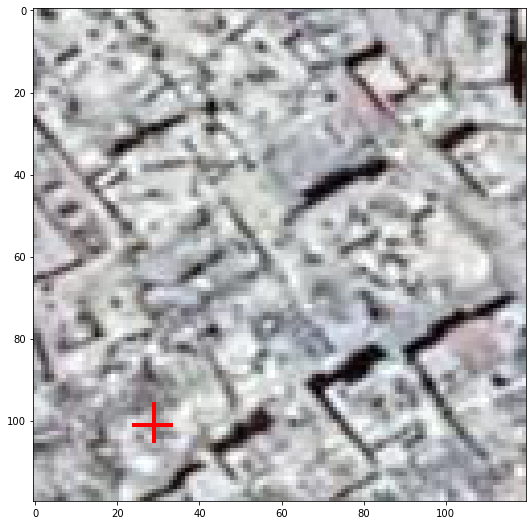

C-Z-1 label:1 pred:1


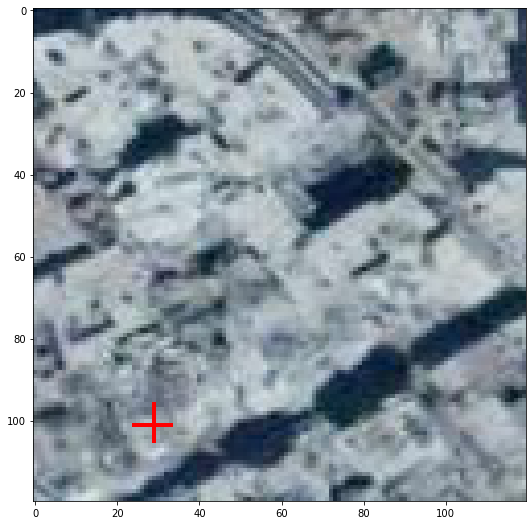

C-Z-2 label:1 pred:1


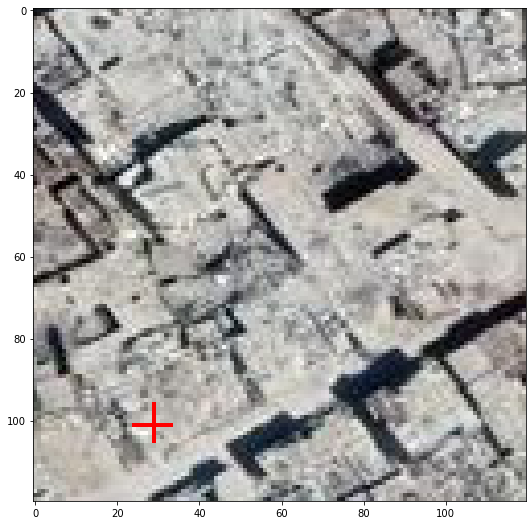

C-Z-3 label:1 pred:1


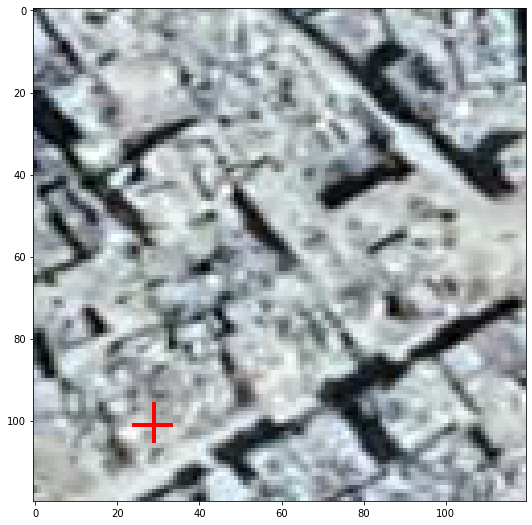

In [81]:
print('A')
pre=imageio.imread(hhh[mt][0][0])
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,3,1)
ax.imshow(pre)
plt.show()
for index in range(1,len(hhh[mt][0])):

    i=hhh[mt][0][index]
    if i is None:
        continue

    # print(i)
    l=os.path.basename(i).split('_')[1]

    m=imageio.imread(i)
    if 'enhance' in l:
        l=l[8:]
    print(l,f'label:{input[1].cpu().numpy()[index-1]}',f'pred:{torch.argmax(output,dim=2)[0].cpu().numpy()[index-1]}')
    if 'rebuilding' not in i:
        label=hhh[mt][1][index]
        # print(label)
    else:
        label='r'
        # print(label)
    if l[0] in ['B','C','D','E','F']:
        mask=np.load('/ssd/hk/Syria_samples/samples_rebuilding/label/'+f'{city}_{l[0]}_{coord}.npy')
        d_coords=np.array(np.where(mask>0))
        for i in range(d_coords.shape[1]):
            d_coord=d_coords[:,i]
            if label=='p':
                m[d_coord[0]-5:d_coord[0]+5,d_coord[1],:]=0
                m[d_coord[0],d_coord[1]-5:d_coord[1]+5,:]=0
                m[d_coord[0]-5:d_coord[0]+5,d_coord[1],0]=255
                m[d_coord[0],d_coord[1]-5:d_coord[1]+5,0]=255
            elif label=='n':
                m[d_coord[0]-5:d_coord[0]+5,d_coord[1],:]=255
                m[d_coord[0],d_coord[1]-5:d_coord[1]+5,:]=255
    elif l[0]=='A':
        pass
    else:
        for i in range(d_coords.shape[1]):
            d_coord=d_coords[:,i]
            m[d_coord[0]-5:d_coord[0]+5,d_coord[1],:]=255
            m[d_coord[0],d_coord[1]-5:d_coord[1]+5,:]=255
            m[d_coord[0]-5:d_coord[0]+5,d_coord[1],2]=0
            m[d_coord[0],d_coord[1]-5:d_coord[1]+5,2]=0




    # plt.figure(figsize=(10,10))
    # plt.imshow(mask)
    # plt.show()
    fig = plt.figure(figsize=(30,10))
    ax = fig.add_subplot(1,3,1)
    ax.imshow(m)
    # ax = fig.add_subplot(1,3,2)
    # ax.imshow(feature1[index-1,0,:,:])
    # ax = fig.add_subplot(1,3,3)
    # ax.imshow(feature2[index-1,0,:,:])
    plt.show()

In [29]:
feature2.shape

torch.Size([16, 512, 30, 30])